LACOUX Coline<br/>
SAAF Yamichou

# TME1 - Arbres de décision, sélection de modèles

In [50]:
# imports des librairies

from  decisiontree  import  DecisionTree
from collections import Counter
import  pickle
import  numpy as np 
from IPython.display import Image
import matplotlib.pyplot as plt
import pydot
from wand.image import Image as WImage

## Exercice 1 - Entropie

### Question 1.1

In [48]:
def entropie(vect):
    """ 
        Retourne l'entropie du vecteur vect
    """
    size = len(vect)
    cnt = Counter(vect)
    h = 0 # entropie
    for y in cnt.keys():
        p = cnt[y] / size
        h -= p * np.log(p)
    return h

In [67]:
v0 = [1,1,1,1,1,1]
v1 = [1,2,1,1,1,1]
v2 = [1,1,2,1,2,2]
print('entropie de v0 : h(Y)=', entropie(v0))
print('entropie de v1 : h(Y)=', entropie(v1))
print('entropie de v2 : h(Y)=', entropie(v2))

entropie de v0 : h(Y)= 0.0
entropie de v1 : h(Y)= 0.45056120886630463
entropie de v2 : h(Y)= 0.6931471805599453


### Question 1.2

In [57]:
def entropie_cond(list_vect):
    """
        Calcule l'entropie conditionelle de la partition à partir de la liste 
        des labels (liste_vect)
    """
    sum_pj = np.array(list_vect).size
    h = 0 # entropie conditionnelle
    for vect_i in list_vect :
        p = len(vect_i) / sum_pj
        h += p * entropie(vect_i)
    return h

### Question 1.3

In [58]:
print('entropie conditionelle : h(Y|P)=', entropie_cond([v0,v1,v2]))

entropie conditionelle : h(Y|P)= 0.38123612980875


## Quelques expériences préliminaires

In [3]:
# chargement d'un extrait de la base imdb

# data : tableau (films ,features), id2titles : dictionnaire  id -> titre ,
# fields : id  feature  -> nom
[data , id2titles , fields]= pickle.load(open("imdb_extrait.pkl","rb")) # la  derniere  colonne  est le vote
datax = data[: ,:32]
datay = np.array([1 if x[33] >6.5  else  -1 for x in data])

### Question 1.4

In [9]:
dts = []

for depth in [2,3,5,10,15, 20, 30, 40,70]: # différentes profondeurs d'arbes
    
    dt = DecisionTree()
    dt.max_depth = depth # on fixe la  taille  de l’arbre a depth
    dt.min_samples_split = 2 # nombre  minimum d’exemples  pour  spliter  un noeud
    
    dt.fit(datax, datay)
    dt.predict(datax [:5 ,:])
    
    print("depth =", depth)
    print("\tscore :", dt.score(datax ,datay)) # dessine l’arbre  dans un  fichier  pdf   si pydot  est  installe
    
    dt.to_pdf("img/test_tree"+str(depth)+".pdf",fields) # sinon  utiliser  http :// www.webgraphviz.com/
    dts.append(dt)

depth = 2
	score : 0.6825812077610639
depth = 3
	score : 0.7183344233703945
depth = 5
	score : 0.736429038587312
depth = 10
	score : 0.8210159145410943
depth = 15
	score : 0.8820579899716591
depth = 20
	score : 0.8984085458905603
depth = 30
	score : 0.9001526051885764
depth = 40
	score : 0.9001526051885764
depth = 70
	score : 0.9001526051885764


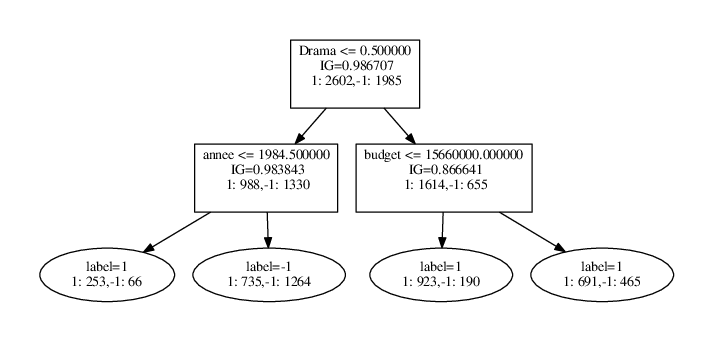

In [14]:
img2 = WImage(filename='img/test_tree2.pdf')
img2

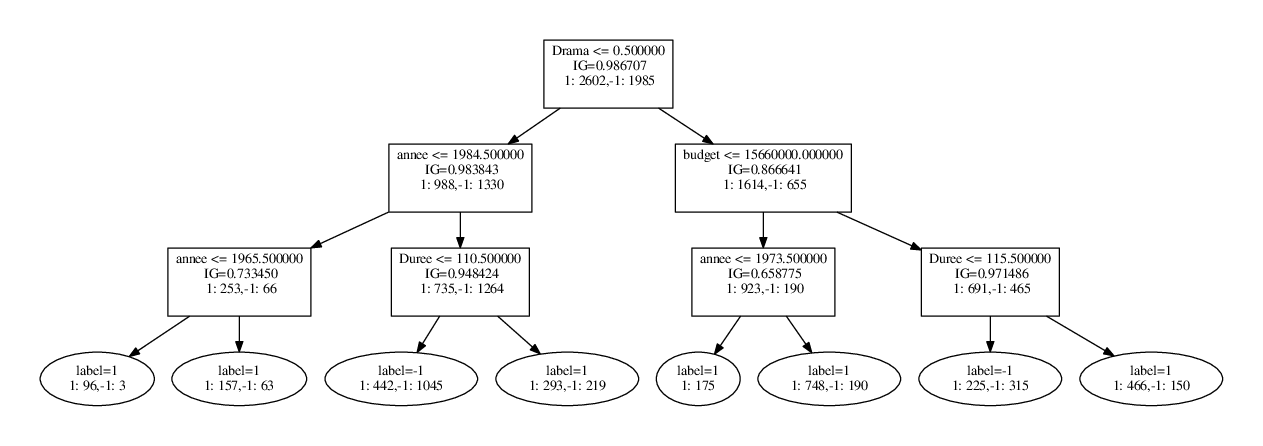

In [15]:
img3 = WImage(filename='img/test_tree3.pdf')
img3

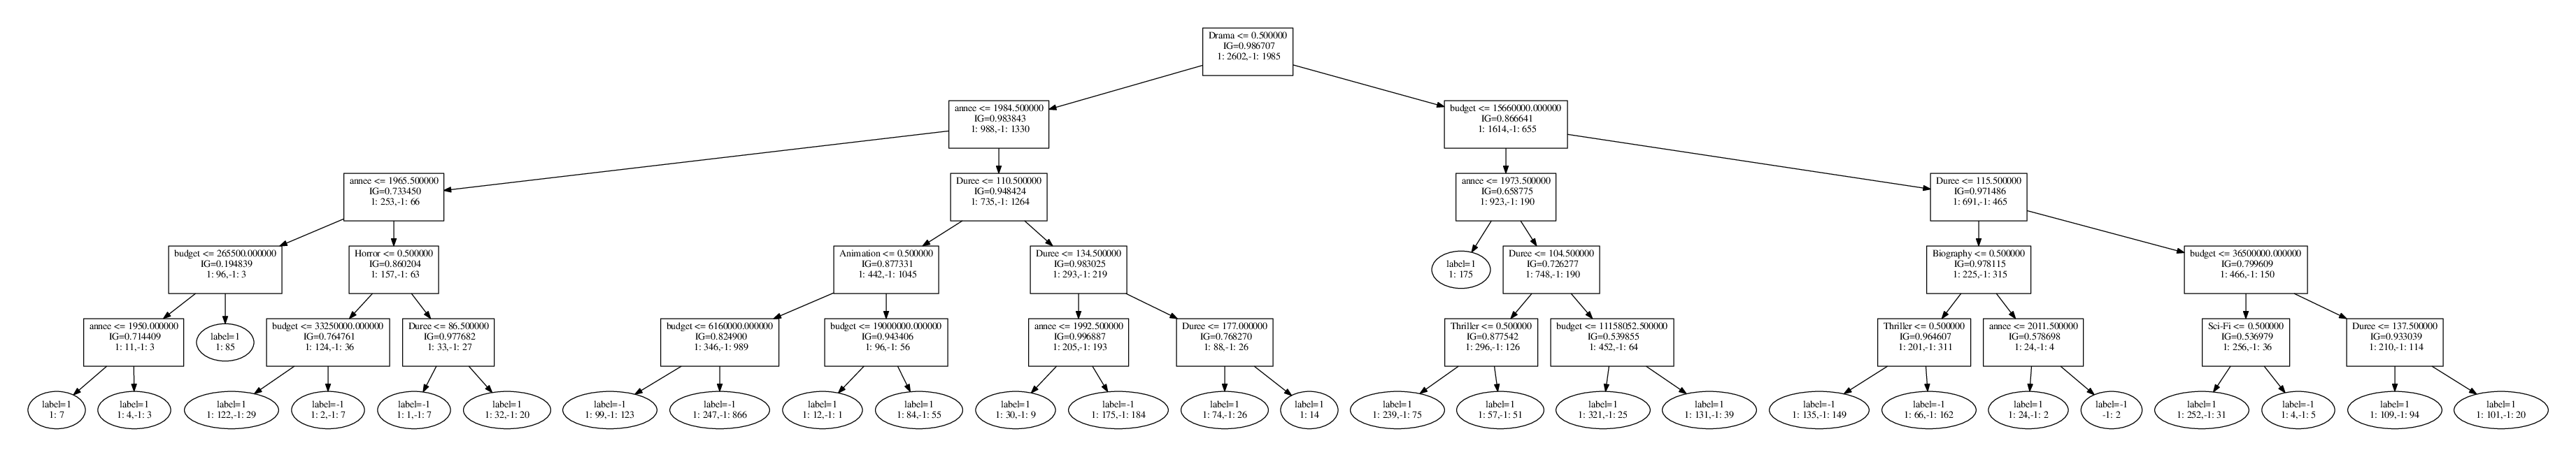

In [13]:
#print(dts[2].print_tree(fields)) # affichage pour depth = 5
img5 = WImage(filename='img/test_tree5.pdf')
img5

blabla
    nb de feuilles : *2 à chaque fois qu'on ajoute une profondeur (car arbre binaire)

### Question 1.5

Les scores augmentent, on se rapproche de 1. c'est normal car de + en + de feuilles donc + précis (sur données d'apprentissage). score max : 0.9001526051885764. Pq   ?   

### Question 1.6

Non, car on teste sur les données avec lesquelles on a appris. Il faut séparer deux ensembles apprentissage / test

## Sur et sous apprentissage

### Question 1.7

In [37]:
def split_data(datax, datay, perc):
    """ 
        Sépare les données en un ensemble d'apprentissage et un ensemble de test
        perc : pourcentage de données dans l'ensemble d'apprentissage
    """
    size = datax.shape[0] # nombre de données
    indices = np.arange(size)
    np.random.shuffle(indices) # mélange aléatoire des indices
    nb_app = int(size*perc) # nombre de données d'appentissage
    id_app = indices[0:nb_app] # indices des données d'apprentissage
    id_test = indices[nb_app:] # indice des données de test
    return datax[id_app], datax[id_test], datay[id_app], datay[id_test]

In [38]:
datax_app, datax_test, datay_app, datay_test = split_data(datax, datay, 0.8)
print(datax_app.shape, datax_test.shape, datay_app.shape, datay_test.shape)

(3669, 32) (918, 32) (3669,) (918,)


In [72]:
def courbes_erreurs(datax, datay, perc):
    """ 
        Trace les courbes de l'erreur en apprentissage et de l'erreur en test 
        en fonction de la profondeur du modèle (de 2 à 40)
    """
    depths = np.arange(30) + 2
    datax_app, datax_test, datay_app, datay_test = split_data(datax, datay, 0.8)
    error_app = []
    error_test = []
    
    for depth in depths:
        dt = DecisionTree()
        dt.max_depth = depth # on fixe la  taille  de l’arbre a depth
        dt.min_samples_split = 2 # nombre  minimum d’exemples  pour  spliter  un noeud
        dt.fit(datax_app, datay_app) # apprentissage
        error_app.append(1 - dt.score(datax_app ,datay_app)) # erreur en apprentissage        
        error_test.append(1 - dt.score(datax_test ,datay_test)) # erreur en test
    
    plt.figure()
    plt.title("Courbes d'erreurs avec taux d'apprentissage="+str(perc))
    plt.plot(depths, error_app, label="Erreur d'apprentissage", color='cornflowerblue')
    plt.xlabel("profondeur de l'arbre")
    plt.plot(depths, error_test, label="Erreur de test", color='crimson')
    plt.ylabel("erreur")
    plt.legend()
    plt.show()

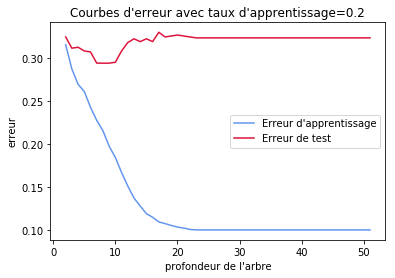

In [73]:
courbes_erreurs(datax, datay, 0.2)

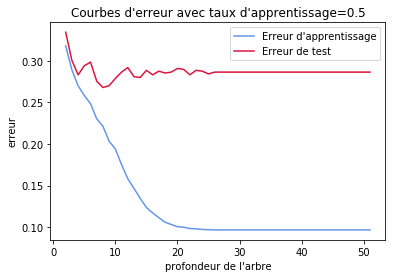

In [75]:
courbes_erreurs(datax, datay, 0.5)

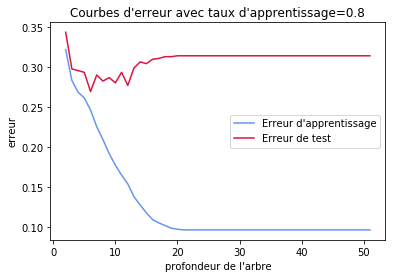

In [76]:
courbes_erreurs(datax, datay, 0.8)

### Question 1.8

remarque : c'est nul (taux d'erreur fort en test)

### Question 1.9

peu fiable, validation croisée

## Validation croisée : sélection de modèle